# Logistic Regression

1. Do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df=pd.read_csv('HR_comma_sep.csv')

In [10]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [11]:
df.shape

(14999, 10)

## EDA

In [22]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [82]:
cols=['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'promotion_last_5years']

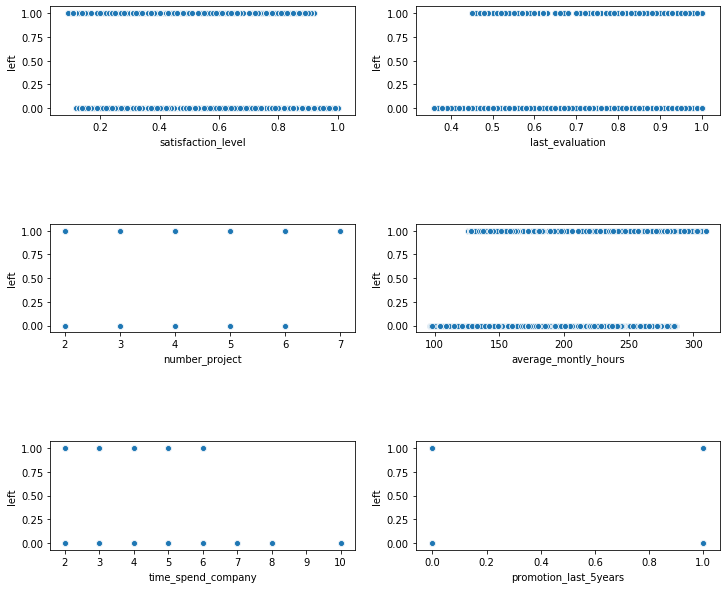

In [83]:
fig, axes=plt.subplots(3,2,figsize=(12, 10))
for idx,cat_col in enumerate(cols):
    row,col = idx//2,idx%2
    sns.scatterplot(x=cols[idx],y='left',data=df,ax=axes[row,col])


plt.subplots_adjust(hspace=1)

In [67]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Form above table we can see that satisfaction level, average monthly hours and promotion in last 5 years are impacting whether an employee will leave the firm or not.


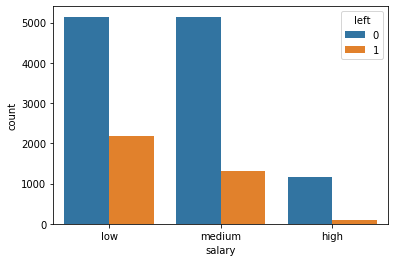

In [72]:
sns.countplot(df.salary,hue=df.left)

Above bar chart shows employees with high salaries are likely to not leave the company

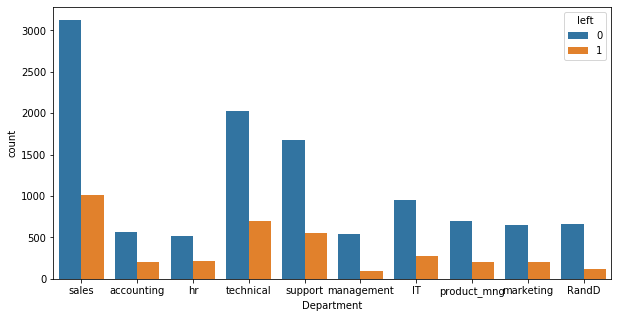

In [77]:
fig=plt.figure(figsize=(10,5))
sns.countplot(df.Department,hue=df.left)

In [81]:
df.groupby('Department').mean()['left']

Department
IT             0.222494
RandD          0.153748
accounting     0.265971
hr             0.290934
management     0.144444
marketing      0.236597
product_mng    0.219512
sales          0.244928
support        0.248991
technical      0.256250
Name: left, dtype: float64

There seem to be some impact of department on employee retention but it is not major hence we will ignore department in our analysis

# Data preprocssing and model fitting

We will be using satisfaction level, average monthly hours, promotion in last 5 years and salary as explanatory variables 

In [89]:
df=df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary' , 'left']]

In [90]:
df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,left
0,0.38,157,0,low,1
1,0.80,262,0,medium,1
2,0.11,272,0,medium,1
3,0.72,223,0,low,1
4,0.37,159,0,low,1


In [98]:
dummy_var=pd.get_dummies(df['salary']).drop('high',axis=1)

In [102]:
df_new=pd.concat([df,dummy_var],axis=1).drop('salary',axis=1)

In [103]:
df_new.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,left,low,medium
0,0.38,157,0,1,1,0
1,0.80,262,0,1,0,1
2,0.11,272,0,1,0,1
3,0.72,223,0,1,1,0
4,0.37,159,0,1,1,0


In [104]:
df_new.columns

Index(['satisfaction_level', 'average_montly_hours', 'promotion_last_5years',
       'left', 'low', 'medium'],
      dtype='object')

In [105]:
X=df_new[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years','low', 'medium']]
y=df.left

In [108]:
from sklearn.model_selection import train_test_split

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [120]:
from sklearn.linear_model import LogisticRegression

In [121]:
reg=LogisticRegression()

In [122]:
reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [123]:
reg.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

# Accuracy

In [124]:
reg.score(X_test,y_test)

0.7813333333333333

# Saving Model

In [125]:
import joblib as jb

In [126]:
jb.dump(reg,'Logistic_model')

['Logistic_model']